# Analysis and Reporting - Cardiovascular Disease Dataset

This Jupyter Notebook contains an exploratory data analysis of the Cardiovascular Disease dataset available in [Kaggle](https://www.kaggle.com/datasets/jocelyndumlao/cardiovascular-disease-dataset). To make the repository self-contained, the dataset is also directly available in the `dataset/` directory of the project.

## Feature Description

The description of all the features in the dataset is available [in PDF format](../dataset/Cardiovascular_Disease_Dataset_Description.pdf).

## Exploratory Data Analysis

We start by importing the required libraries and loading the dataset. We also convert some of the binary values into human-readable labels so that our analysis is more readable.

In [439]:
%matplotlib inline
import pandas
import seaborn as sns
from matplotlib import pyplot

# A nicer plotting style
pyplot.style.use("seaborn-v0_8")

df = pandas.read_csv("../dataset/Cardiovascular_Disease_Dataset.csv")
# Binary values to human readable labels
df["label"] = df["target"].map({0: "No heart disease", 1: "Heart disease"})
df["gender"] = df["gender"].map({0: "Female", 1: "Male"})
# Create 10-year groups.
df["ageGroup"] = pandas.cut(df["age"], bins=range(10, 90, 10))

df.head()

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target,label,ageGroup
0,103368,53,Male,2,171,0,0,1,147,0,5.3,3,3,1,Heart disease,"(50, 60]"
1,119250,40,Male,0,94,229,0,1,115,0,3.7,1,1,0,No heart disease,"(30, 40]"
2,119372,49,Male,2,133,142,0,0,202,1,5.0,1,0,0,No heart disease,"(40, 50]"
3,132514,43,Male,0,138,295,1,1,153,0,3.2,2,2,1,Heart disease,"(40, 50]"
4,146211,31,Male,1,199,0,0,2,136,0,5.3,3,2,1,Heart disease,"(30, 40]"


We can get some basic details about our dataset such as the number of patients with and without heart disease, the number of patients of each gender, and the age distribution.

### Demographics

In this section we explore the dataset looking at the demography of the patients. We use `age` and `gender` to produce statistics that help us understand how balanced is the data and if there are any biases towards an age group and/or gender.

#### Number of patients with and without heart disease

label
Heart disease       0.58
No heart disease    0.42
Name: proportion, dtype: float64


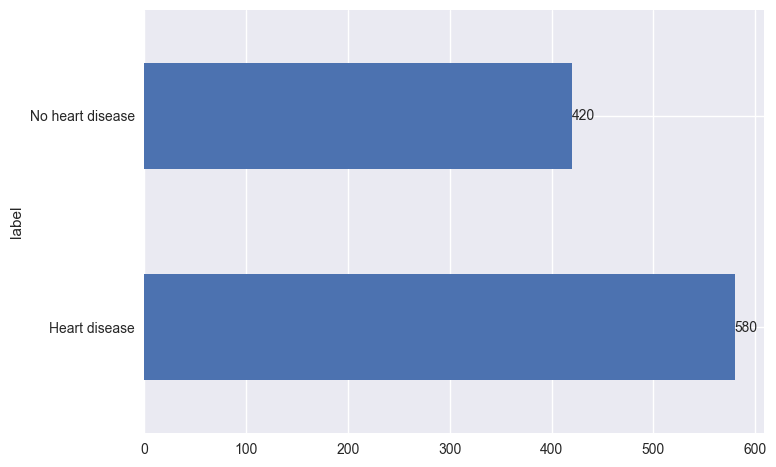

In [440]:
# Plot the number of patients with and without heart disease
hist = df["label"].value_counts().plot.barh()
hist.bar_label(hist.containers[0])
print(df["label"].value_counts(normalize=True))

#### Number of patients of each gender

gender
Male      0.765
Female    0.235
Name: proportion, dtype: float64


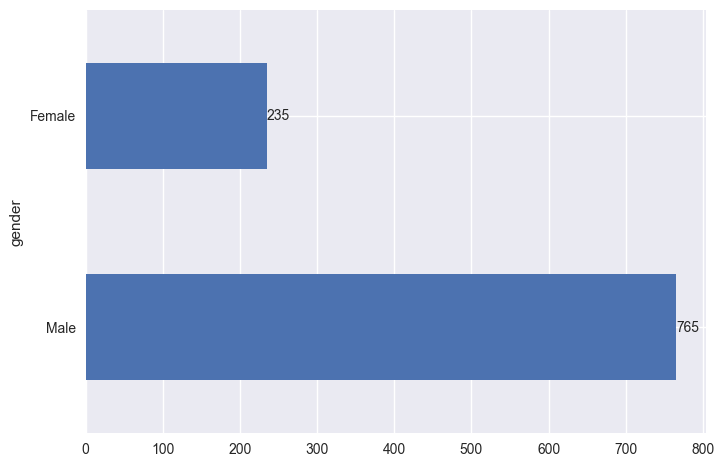

In [441]:
# Plot the number of patients of each gender.
hist = df["gender"].value_counts().plot.barh()
hist.bar_label(hist.containers[0])
print(df["gender"].value_counts(normalize=True))

#### Distribution of ages across genders

gender
Female    Axes(0.125,0.11;0.775x0.77)
Male      Axes(0.125,0.11;0.775x0.77)
Name: age, dtype: object

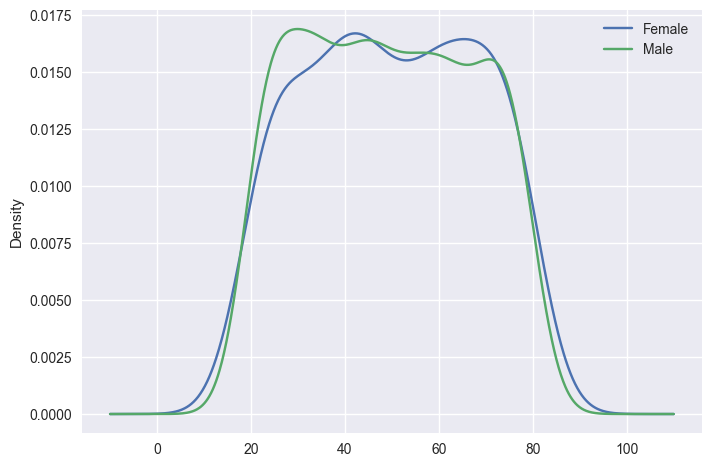

In [442]:
# Plot the distribution of ages (per gender).
df.groupby("gender")["age"].plot(kind="kde", legend=True)

This basic metrics tell us that, although the dataset is well-balanced in terms of age groups, and patients with and without disease, this dataset has a strong bias towards male patients as they conform more than 76% of the total.

#### Distribution of patients with and without disease across genders

As mentioned in the previous section, most of the patients (~76%) are male. If we look at the distribution of ill patients across genders, we can see that the distribution persists.

[Text(0, 0, '0.77069'), Text(0, 0, '0.22931')]

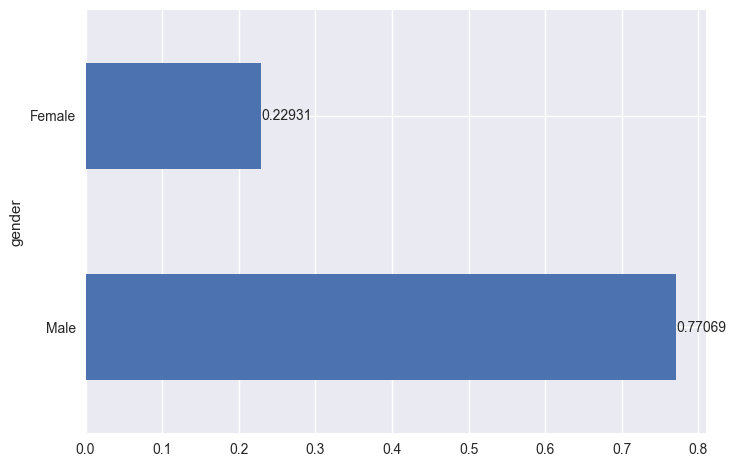

In [443]:
hist =df.loc[df["target"] == 1]["gender"].value_counts(normalize=True).plot.barh()
hist.bar_label(hist.containers[0])

Moreover, the percentages of patients with and without disease is similar between genders:

label   Heart disease  No heart disease
gender                                 
Female            133               102
Male              447               318


<Axes: ylabel='gender'>

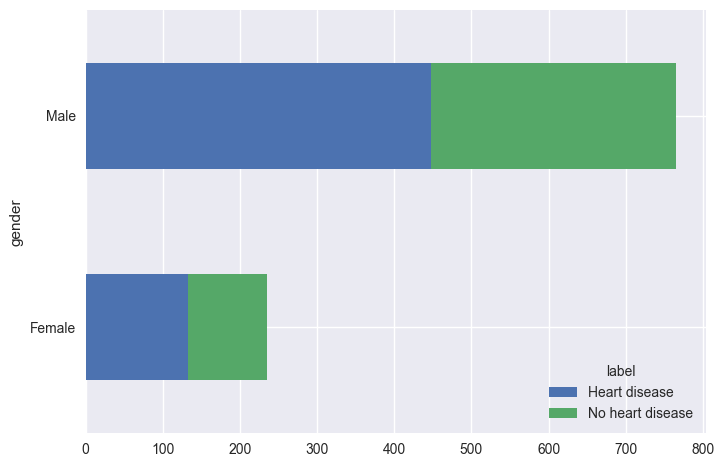

In [444]:
gender_distribution = df.groupby(["gender", "label"])["label"].count().unstack()
print(gender_distribution)
gender_distribution.plot.barh(stacked=True)

label   Heart disease  No heart disease
gender                                 
Female       0.565957          0.434043
Male         0.584314          0.415686
label
Heart disease       0.575136
No heart disease    0.424864
dtype: float64


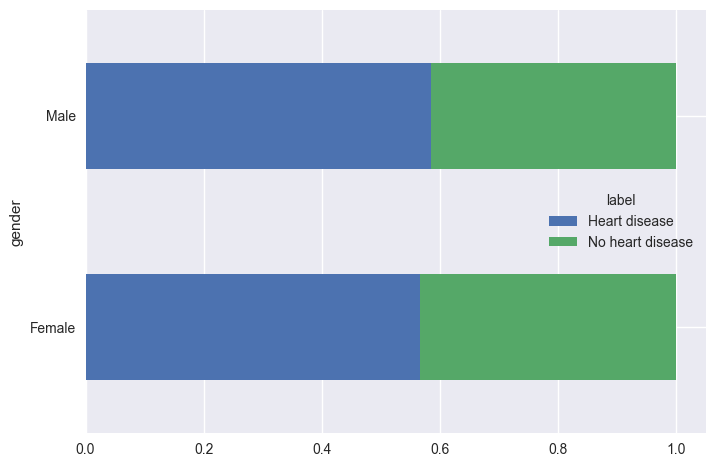

In [445]:
pct_distribution = df.groupby(["gender"])["label"].value_counts(normalize=True).unstack()
print(pct_distribution)
pct_distribution.plot.barh(stacked=True)
print(pct_distribution.mean())

#### Distribution of patients with and without disease across age groups

label     Heart disease  No heart disease
ageGroup                                 
(10, 20]       0.535714          0.464286
(20, 30]       0.517857          0.482143
(30, 40]       0.597561          0.402439
(40, 50]       0.648148          0.351852
(50, 60]       0.587500          0.412500
(60, 70]       0.614379          0.385621
(70, 80]       0.527273          0.472727
label
Heart disease       0.57549
No heart disease    0.42451
dtype: float64


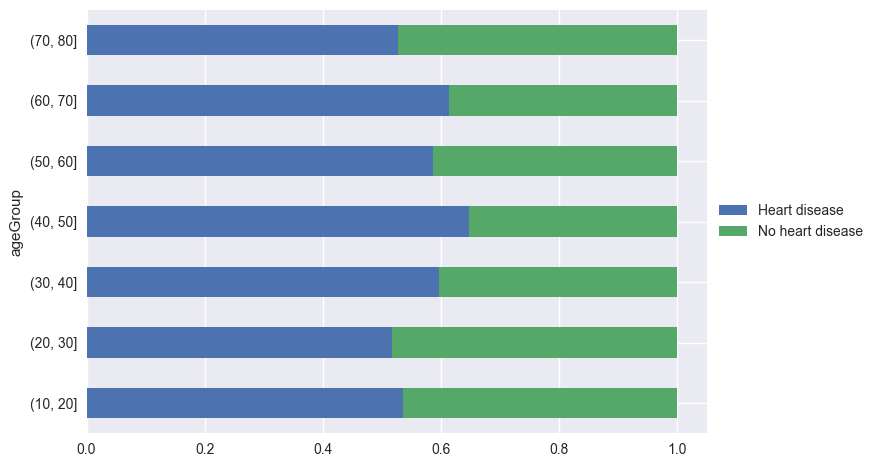

In [446]:
# Distribution of patients with and without disease across age groups.
pct_distribution = df.groupby(["ageGroup"], observed=True)["label"].value_counts(normalize=True).unstack()
print(pct_distribution)
pct_distribution.plot.barh(stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))
print(pct_distribution.mean())

#### Conclusions

We have observed that:
1. There is a similar number of patients with and without heart disease, 58% and 42% respectively.
2. The dataset contains more male patients, about 76% of the total.
3. The dataset contains more male patients with a heart disease, about 77% of the total.
4. When grouping by gender, the distribution of patients with heart disease is similar across genders, about 57% over the total.
5. When grouping by age groups, the distribution of patients with heart disease is similar across age groups, about 57% over the total.

Given these facts, we conclude that the dataset has been collected/curated to generate an even demographic distribution. It is important to note that there is a bias towards male patients as they represent more than three quarters of the dataset.

Because how evenly distributed the dataset is, and assuming that the features are sufficient to generate a prediction, we should be able to configure a good prediction model as long as we account for gender and age differences to ensure the model is unbiased.

### Analysis of categorical features

In this section we collect basic statistics for the values of all the features in the dataset considering genders and age groups.

#### Number of major vessels

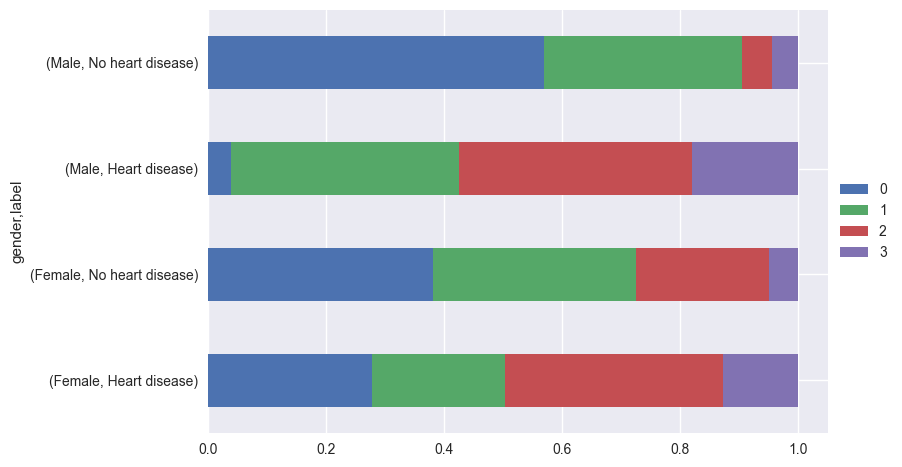

In [447]:
pct_distribution = df.groupby(["gender", "label"], observed=True)["noofmajorvessels"].value_counts(normalize=True).unstack()
pct_distribution.plot.barh(stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

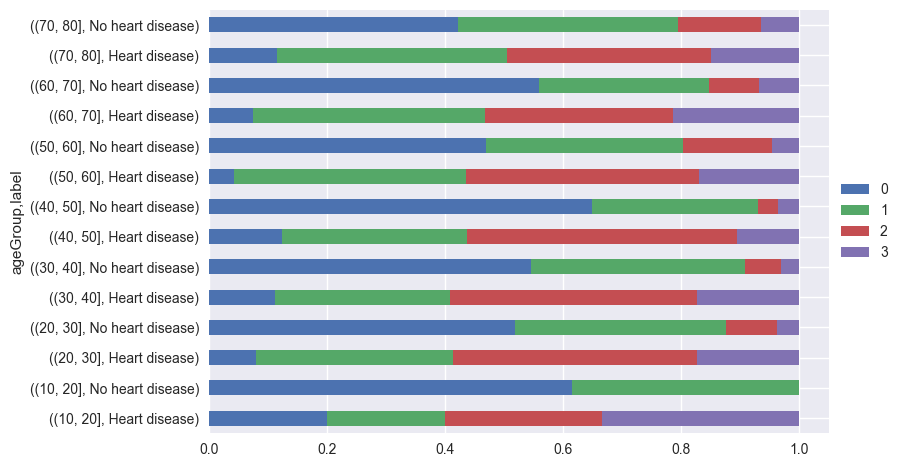

In [448]:
pct_distribution = df.groupby(["ageGroup", "label"], observed=True)["noofmajorvessels"].value_counts(normalize=True).unstack()
pct_distribution.plot.barh(stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5))

#### Slope of the peak exercise ST segment

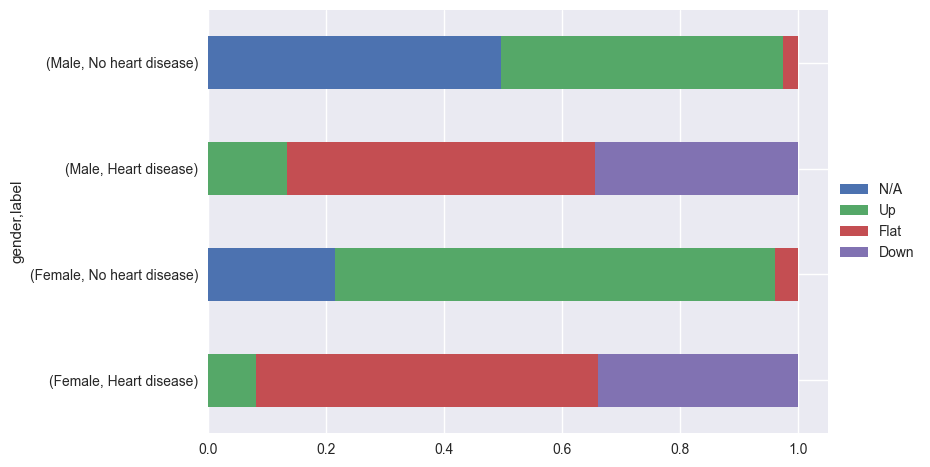

In [457]:
pct_distribution = df.groupby(["gender", "label"], observed=True)["slope"].value_counts(normalize=True).unstack()
pct_distribution.plot.barh(stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5), labels=["N/A", "Up", "Flat", "Down"])

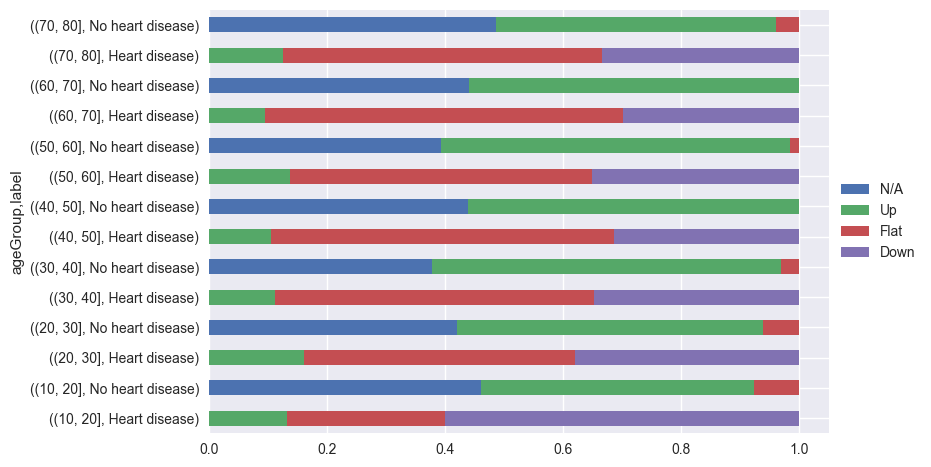

In [458]:
pct_distribution = df.groupby(["ageGroup", "label"], observed=True)["slope"].value_counts(normalize=True).unstack()
pct_distribution.plot.barh(stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5), labels=["N/A", "Up", "Flat", "Down"])

#### Exercise-induced angina

exerciseangia
0    0.484523
1    0.515477
dtype: float64


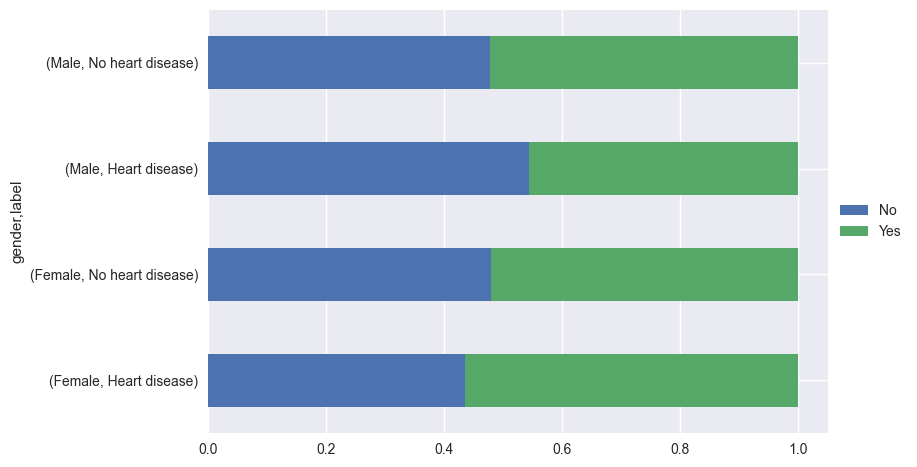

In [459]:
pct_distribution = df.groupby(["gender", "label"], observed=True)["exerciseangia"].value_counts(normalize=True).unstack()
pct_distribution.plot.barh(stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5), labels=["No", "Yes"])
print(pct_distribution.mean())

exerciseangia
0    0.504619
1    0.495381
dtype: float64


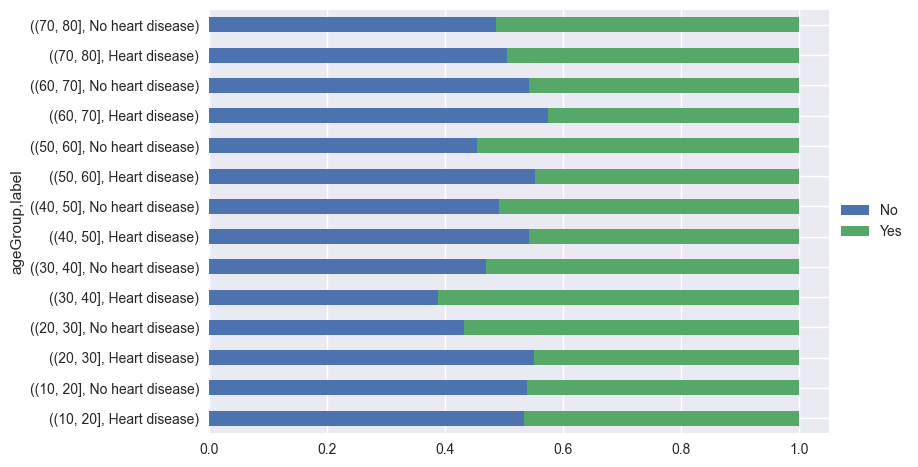

In [460]:
pct_distribution = df.groupby(["ageGroup", "label"], observed=True)["exerciseangia"].value_counts(normalize=True).unstack()
pct_distribution.plot.barh(stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5), labels=["No", "Yes"])
print(pct_distribution.mean())

# Resting electrocardiogram results

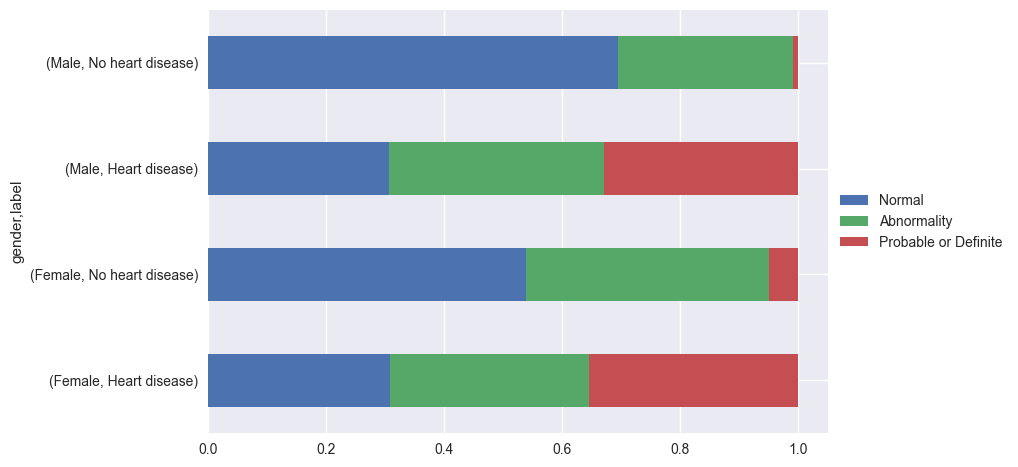

In [461]:
pct_distribution = df.groupby(["gender", "label"], observed=True)["restingrelectro"].value_counts(normalize=True).unstack()
pct_distribution.plot.barh(stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5), labels=["Normal", "Abnormality", "Probable or Definite"])

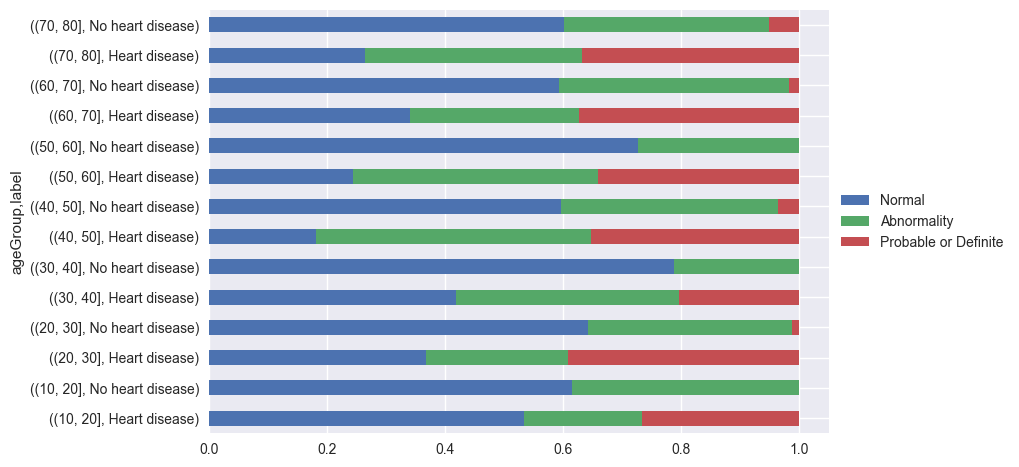

In [462]:
pct_distribution = df.groupby(["ageGroup", "label"], observed=True)["restingrelectro"].value_counts(normalize=True).unstack()
pct_distribution.plot.barh(stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5), labels=["Normal", "Abnormality", "Probable or Definite"])

#### Chest pain type

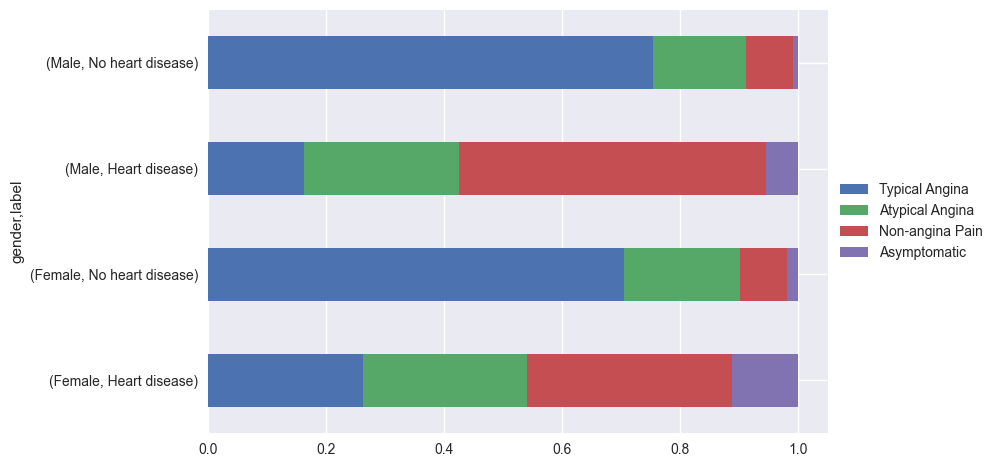

In [465]:
pct_distribution = df.groupby(["gender", "label"], observed=True)["chestpain"].value_counts(normalize=True).unstack()
pct_distribution.plot.barh(stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5), labels=["Typical Angina", "Atypical Angina", "Non-angina Pain", "Asymptomatic"])

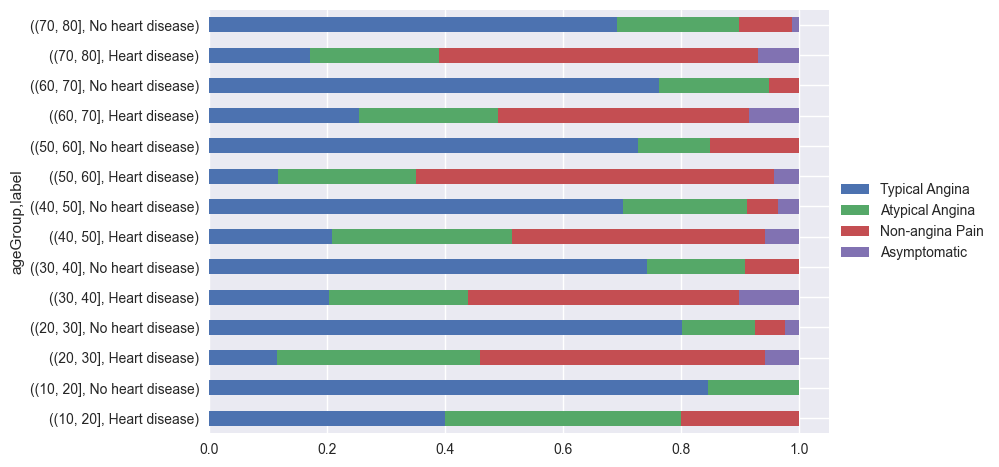

In [464]:
pct_distribution = df.groupby(["ageGroup", "label"], observed=True)["chestpain"].value_counts(normalize=True).unstack()
pct_distribution.plot.barh(stacked=True).legend(loc='center left', bbox_to_anchor=(1, 0.5), labels=["Typical Angina", "Atypical Angina", "Non-angina Pain", "Asymptomatic"])

<Axes: >

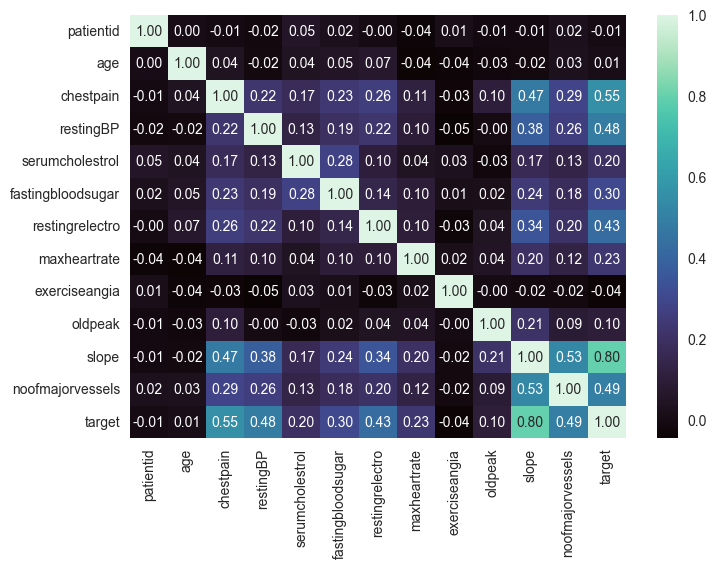

In [453]:
# Generate correlation matrix excluding string and interval columns
exclude_columns = ["label", "gender", "ageGroup"]
correlation_matrix = df.loc[:, ~df.columns.isin(exclude_columns)].corr()
sns.heatmap(correlation_matrix, fmt=".2f", annot=True, cmap="mako")